<a href="https://colab.research.google.com/github/shin-hyunsoo/python/blob/master/dss_dp_hw1_r0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Normal - Library ----------------------------------------------------------------------------------
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

# MLP - Library -------------------------------------------------------------------------------------
from keras import models
from keras import layers
from keras import optimizers
from keras.utils.np_utils import to_categorical


Using TensorFlow backend.


In [0]:
#!pip install -U -q PyDrive

In [0]:
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials
   
# # PyDrive Authentication
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)


In [0]:
# folder_id = '1-8S7zrqtZn26NMP9JODBzdv7OMxmOVLo'
   
# def ListFolder(parent):
#     filelist=[]
#     file_list = drive.ListFile({'q': "'%s' in parents and trashed=false" % parent}).GetList()
#     for f in file_list:
#         if f['mimeType']=='application/vnd.google-apps.folder': # if folder
#             filelist.append({"id":f['id'],"title":f['title'],"list":ListFolder(f['id'])})
#         else:
#             filelist.append({"title":f['title'],"id":f['id']})
#     return filelist
   
   
# file_lists = ListFolder(folder_id)
# print(file_lists)

In [0]:
# choose a local (colab) directory to store the data.
# local_download_path = os.path.expanduser('~/my_sample_data')
# try:
# 	os.makedirs(local_download_path)
# except: pass

In [0]:
# ret = []
# for file in file_lists:
#     print('title: %s, id: %s' % (file['title'], file['id']))
#     fname = os.path.join(local_download_path, file['title'])
#     print('downloading to {}'.format(fname))
#     f_ = drive.CreateFile({'id': file['id']})
#     f_.GetContentFile(fname)
#     print(fname)
#     ret.append(fname)

In [0]:
# df = pd.read_csv(ret[0], encoding="ISO-8859-1", sep='delimiter')

In [0]:
# df.head()

In [8]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [14]:
!ls -rtl /gdrive/My\ Drive/DATA

total 295
-rw------- 1 root root  13756 Oct  9 10:54 Iris_data.xlsx
-rw------- 1 root root  21510 Oct  9 10:55 Liver_data.xlsx
-rw------- 1 root root 265656 Oct  9 10:56 Abalone_original.xlsx


In [0]:
df = pd.read_excel("/gdrive/My Drive/DATA/Iris_data.xlsx")

In [27]:
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train on 73 samples, validate on 32 samples
Epoch 1/100
73/73 [==============================] - 0s 6ms/step - loss: 1.2379 - acc: 0.2877 - val_loss: 0.9318 - val_acc: 0.7187
Epoch 2/100
73/73 [==============================] - 0s 512us/step - loss: 1.1054 - acc: 0.5205 - val_loss: 0.7414 - val_acc: 0.7187
Epoch 3/100
73/73 [==============================] - 0s 576us/step - loss: 0.6897 - acc: 0.6575 - val_loss: 1.5613 - val_acc: 0.3125
Epoch 4/100
73/73 [==============================] - 0s 552us/step - loss: 0.7690 - acc: 0.5890 - val_loss: 0.7840 - val_acc: 0.7187
Epoch 5/100
73/73 [==============================] - 0s 710us/step - loss: 0.6380 - acc: 0.6712 - val_loss: 0.8145 - val_acc: 0.5938
Epoch 6/100
73/73 [==============================] - 0s 566us/step - loss: 0.6765 - acc: 0.6575 - val_loss: 1.6801 - val_acc: 0.5938
Epoch 7/100
73/73 [==============================] - 0s 528us/step - loss: 0.7030 - acc: 0.6986 - val_loss: 0.4894 - val_acc: 0.7187
Epoch 8/100
73/73 [========

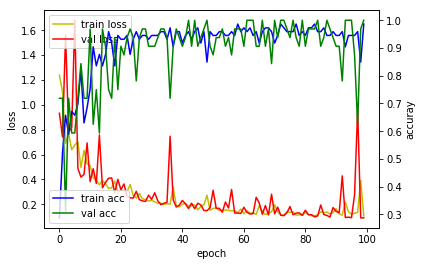

(4, 50) (50,)
(50, 50) (50,)
(50, 3) (3,)
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 50)                250       
_________________________________________________________________
dense_23 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_24 (Dense)             (None, 3)                 153       
Total params: 2,953
Trainable params: 2,953
Non-trainable params: 0
_________________________________________________________________
45/45 [==============================] - 0s 120us/step


< TEST RESULT >
 [0.09410298764705657, 1.0]


In [33]:

#######################################################################################################################
# < Problem 2 > Iris_data
#######################################################################################################################
# 1. Data Load ------------------------------------------------------------------------------------------ 
#df = pd.read_excel("data/Abalone_original.xlsx")
#df = pd.read_excel("data/Iris_data.xlsx")
#df = pd.read_excel("data/Liver_data.xlsx")
np.random.seed(2045070)
df.shape
df.columns
df["Class"].dtype
df["Class"].value_counts()

data_x = df.iloc[:,:-1]
data_y = df.iloc[:,-1:]
label_encoder = LabelEncoder()
data_y1 = label_encoder.fit_transform(data_y)
data_y2 = to_categorical(data_y1)
data_y2.shape

train_x, test__x, train_y, test__y = train_test_split(data_x, data_y2, test_size=0.3)
train_x.shape
test__x.shape
test__y.shape

# 2. Make MLP ----------------------------------------------------------------------------------------
a_func = None
#a_func = 'relu'
opti_func = 'sgd'
#opti_func = 'rmsprop'
loop_cnt = 2
set_Node = [50] * loop_cnt 

count_feature = train_x.shape[1]
count__output = test__y.shape[1]

if count__output == 2 :
    last_activation = "sigmoid"
    v_loss = "binary_crossentropy"
elif count__output == 1 :
    last_activation = -1
    v_loss = -1
    print("Please Check Y_class, You have to convert sparse categorical~!")
else:
    last_activation = "softmax"
    v_loss = "categorical_crossentropy"

model = models.Sequential()

for loop_idx in range(loop_cnt):
    if loop_idx==0: model.add( layers.Dense(set_Node[loop_idx], activation=a_func, input_shape=(count_feature,) ) )
    else:           model.add( layers.Dense(set_Node[loop_idx], activation=a_func ) )

model.add( layers.Dense(count__output, activation=last_activation) )       
model.compile(optimizer = opti_func, loss = v_loss, metrics = ['accuracy'])

# 3. Fitting ----------------------------------------------------------------------------------------
#model.fit(train_x, train_y, epochs = 5, batch_size = 128)
val_size = round( train_x.shape[0]*0.3 )
x_val = train_x[:val_size]
partial_x_train = train_x[val_size:]
y_val = train_y[:val_size]
partial_y_train = train_y[val_size:]
hist = model.fit(partial_x_train,
                 partial_y_train,
                 epochs=100,
                 batch_size=10,
                 validation_data=(x_val, y_val))

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()

for model_layer in model.layers:
#    print(model_layer.name, type(model_layer), model_layer.output_shape, model_layer.activation.__name__, model_layer.count_params())
    w1 = model_layer .get_weights()
#    print(w1)
    print( w1[0].shape, w1[1].shape )
model.summary()

results = model.evaluate(test__x, test__y)
print("\n\n< TEST RESULT >\n", results)


In [0]:
df = pd.read_excel("/gdrive/My Drive/DATA/Abalone_original.xlsx")

In [24]:
df.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,Class
0,0,0,1,0.075,0.055,0.010,0.0020,0.0010,0.0005,0.0015,1
1,0,0,1,0.150,0.100,0.025,0.0150,0.0045,0.0040,0.0050,2
2,0,0,1,0.130,0.100,0.030,0.0130,0.0045,0.0030,0.0040,3
3,0,0,1,0.110,0.090,0.030,0.0080,0.0025,0.0020,0.0030,3
4,0,0,1,0.165,0.120,0.030,0.0215,0.0070,0.0050,0.0050,3


In [25]:
results = model.evaluate(test__x, test__y)
print(results)


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train on 2046 samples, validate on 877 samples
Epoch 1/100
2046/2046 [==============================] - 1s 551us/step - loss: 2.8324 - acc: 0.1500 - val_loss: 2.5579 - val_acc: 0.1790
Epoch 2/100
2046/2046 [==============================] - 1s 472us/step - loss: 2.4551 - acc: 0.2038 - val_loss: 2.4395 - val_acc: 0.1938
Epoch 3/100
2046/2046 [==============================] - 1s 446us/step - loss: 2.3712 - acc: 0.2028 - val_loss: 2.3895 - val_acc: 0.1893
Epoch 4/100
2046/2046 [==============================] - 1s 441us/step - loss: 2.3255 - acc: 0.2116 - val_loss: 2.3407 - val_acc: 0.2098
Epoch 5/100
2046/2046 [==============================] - 1s 451us/step - loss: 2.2922 - acc: 0.2297 - val_loss: 2.3206 - val_acc: 0.1984
Epoch 6/100
2046/2046 [==============================] - 1s 449us/step - loss: 2.2686 - acc: 0.2268 - val_loss: 2.3124 - val_acc: 0.2041
Epoch 7/100
2046/2046 [==============================] - 1s 447us/step - loss: 2.2508 - acc: 0.2341 - val_loss: 2.2967 - val_acc: 0